In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/traitlets/config/application.py", line 658, 

## Load data

In [2]:
data = pd.read_csv('ts.csv')
data.head()

,DATE,IN_FOR,OUT_FOR,IN_KZT,OUT_KZT
0,1/1/2016,0.0,122953.0,1899647.0,1584705.0
1,1/2/2016,2942.0,115059.0,2706416.0,2315761.0
2,1/3/2016,263.0,147905.0,3548855.0,2971268.0
3,1/4/2016,13533594.0,9363025.0,23528654.0,11716898.0
4,1/5/2016,36769881.0,32769452.0,37289979.0,22565273.0


## Data review

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 5 columns):
DATE       731 non-null object
IN_FOR     731 non-null float64
OUT_FOR    731 non-null float64
IN_KZT     731 non-null float64
OUT_KZT    731 non-null float64
dtypes: float64(4), object(1)
memory usage: 28.6+ KB


In [4]:
data.describe()

,IN_FOR,OUT_FOR,IN_KZT,OUT_KZT
count,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02
mean,1.793755e+07,2.169297e+07,6.212575e+07,5.365687e+07
std,1.199034e+07,1.480297e+07,2.672071e+07,2.749811e+07
min,0.000000e+00,1.150590e+05,1.899647e+06,1.584705e+06
25%,1.109780e+07,9.330364e+06,4.568578e+07,3.544309e+07
50%,1.618402e+07,2.086135e+07,6.138808e+07,4.886765e+07
75%,2.203082e+07,2.772768e+07,7.837294e+07,7.016177e+07
max,1.382569e+08,1.218774e+08,2.900609e+08,2.411742e+08


In [5]:
data['DATE'] = pd.to_datetime(data['DATE'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 5 columns):
DATE       731 non-null datetime64[ns]
IN_FOR     731 non-null float64
OUT_FOR    731 non-null float64
IN_KZT     731 non-null float64
OUT_KZT    731 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 28.6 KB


In [7]:
data.head()

,DATE,IN_FOR,OUT_FOR,IN_KZT,OUT_KZT
0,2016-01-01,0.0,122953.0,1899647.0,1584705.0
1,2016-01-02,2942.0,115059.0,2706416.0,2315761.0
2,2016-01-03,263.0,147905.0,3548855.0,2971268.0
3,2016-01-04,13533594.0,9363025.0,23528654.0,11716898.0
4,2016-01-05,36769881.0,32769452.0,37289979.0,22565273.0


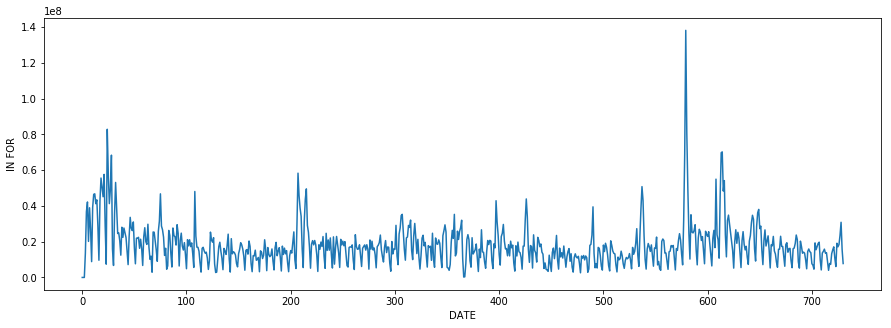

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(data['IN_FOR'])
plt.xlabel('DATE')
plt.ylabel('IN FOR')
plt.show()

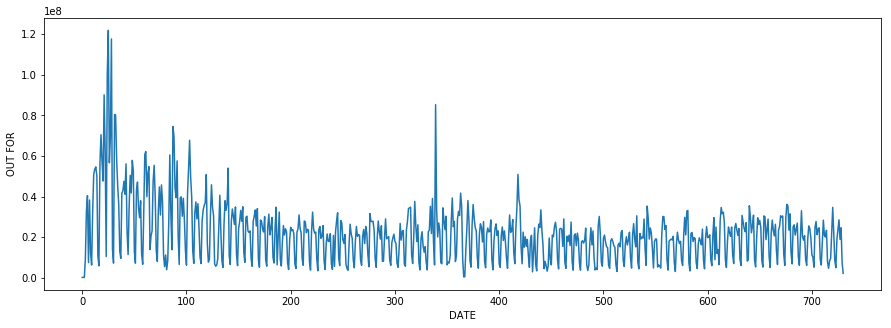

In [9]:
plt.figure(figsize=(15, 5))
plt.plot(data['OUT_FOR'])
plt.xlabel('DATE')
plt.ylabel('OUT FOR')
plt.show()

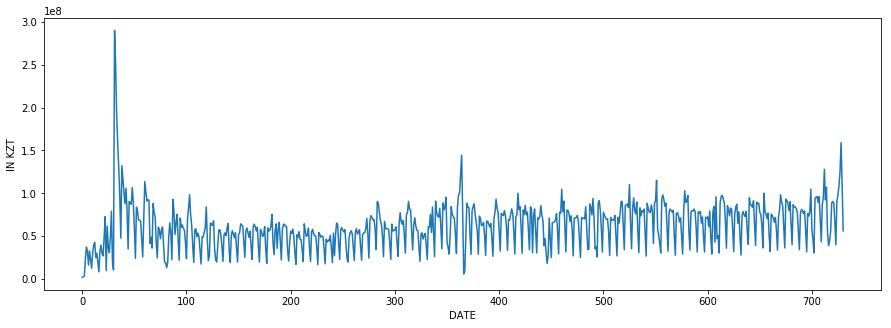

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(data['IN_KZT'])
plt.xlabel('DATE')
plt.ylabel('IN KZT')
plt.show()

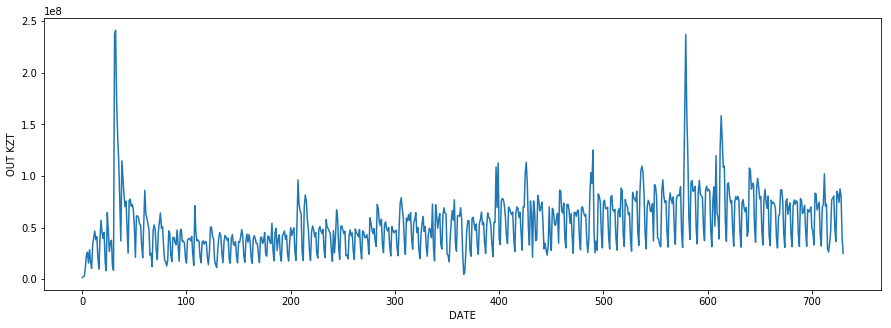

In [11]:
plt.figure(figsize=(15, 5))
plt.plot(data['OUT_KZT'])
plt.xlabel('DATE')
plt.ylabel('OUT KZT')
plt.show()

### Split dataset

In [12]:
dataset_in_for = data.drop

## LSTM Network for Regression
### Base line

In [13]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


Before we do anything, it is a good idea to fix the random number seed to ensure our results are reproducible.

In [15]:
# fix random seed for reproducibility
np.random.seed(7)

### Predict for IN_FOR

In [16]:
# dataset = data.drop('DATE', axis = 1)
dataset_in_for = data['IN_FOR'].values

In [19]:
dataset_in_for = dataset_in_for.reshape(731, 1)

In [20]:
dataset_in_for.shape

(731, 1)

In [21]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_in_for = scaler.fit_transform(dataset_in_for)

In [24]:
# split into train and test sets
train_size = int(len(dataset_in_for) * 0.6768)
test_size = len(dataset_in_for) - train_size
train, test = dataset_in_for[0:train_size,:], dataset_in_for[train_size:len(dataset_in_for),:]
print(len(train), len(test))

494 237


In [27]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i : (i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [28]:
print(create_dataset(dataset_in_for))

(array([[0.00000000e+00],
       [2.12792299e-05],
       [1.90225611e-06],
       [9.78873074e-02],
       [2.65953349e-01],
       [3.05461154e-01],
       [1.45833390e-01],
       [2.82028555e-01],
       [1.93867194e-01],
       [6.40223243e-02],
       [2.84153282e-01],
       [3.36426542e-01],
       [3.38473832e-01],
       [2.98510621e-01],
       [3.13995022e-01],
       [2.08793525e-01],
       [6.96457839e-02],
       [3.10409537e-01],
       [4.02315478e-01],
       [3.64595179e-01],
       [3.26560045e-01],
       [4.17130097e-01],
       [2.07826521e-01],
       [5.37697859e-02],
       [5.99671982e-01],
       [4.16222272e-01],
       [2.98794831e-01],
       [3.56503003e-01],
       [4.94912264e-01],
       [1.14982391e-01],
       [4.84953867e-02],
       [2.57651353e-01],
       [3.84444368e-01],
       [2.76642603e-01],
       [1.77634556e-01],
       [1.80454864e-01],
       [1.48296884e-01],
       [9.01497179e-02],
       [2.03279449e-01],
       [1.62242338e-01],

reshape into X=t and Y=t+1

In [29]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [31]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

### create and fit the LSTM network

In [32]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=55, batch_size=1, verbose=2)

Epoch 1/55
 - 2s - loss: 0.0067
Epoch 2/55
 - 1s - loss: 0.0052
Epoch 3/55
 - 1s - loss: 0.0049
Epoch 4/55
 - 1s - loss: 0.0046
Epoch 5/55
 - 1s - loss: 0.0045
Epoch 6/55
 - 2s - loss: 0.0045
Epoch 7/55
 - 2s - loss: 0.0044
Epoch 8/55
 - 3s - loss: 0.0045
Epoch 9/55
 - 2s - loss: 0.0044
Epoch 10/55
 - 1s - loss: 0.0045
Epoch 11/55
 - 1s - loss: 0.0044
Epoch 12/55
 - 1s - loss: 0.0045
Epoch 13/55
 - 1s - loss: 0.0045
Epoch 14/55
 - 1s - loss: 0.0044
Epoch 15/55
 - 2s - loss: 0.0045
Epoch 16/55
 - 1s - loss: 0.0044
Epoch 17/55
 - 1s - loss: 0.0044
Epoch 18/55
 - 1s - loss: 0.0044
Epoch 19/55
 - 1s - loss: 0.0044
Epoch 20/55
 - 1s - loss: 0.0044
Epoch 21/55
 - 1s - loss: 0.0045
Epoch 22/55
 - 1s - loss: 0.0044
Epoch 23/55
 - 1s - loss: 0.0044
Epoch 24/55
 - 1s - loss: 0.0044
Epoch 25/55
 - 1s - loss: 0.0044
Epoch 26/55
 - 2s - loss: 0.0044
Epoch 27/55
 - 2s - loss: 0.0045
Epoch 28/55
 - 1s - loss: 0.0044
Epoch 29/55
 - 2s - loss: 0.0044
Epoch 30/55
 - 1s - loss: 0.0044
Epoch 31/55
 - 1s -

### make predictions

In [33]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 9111073.60 RMSE
Test Score: 10489033.86 RMSE


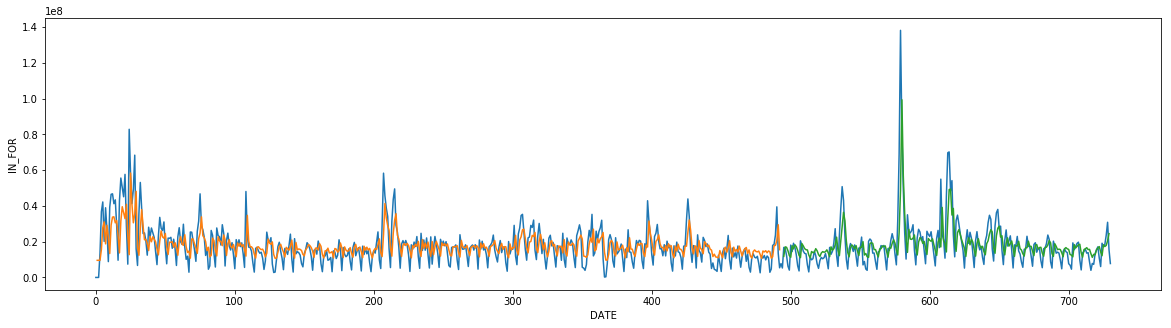

In [36]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset_in_for)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset_in_for)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset_in_for)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20, 5))
plt.plot(scaler.inverse_transform(dataset_in_for))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('DATE')
plt.ylabel('IN_FOR')
plt.show()

### Predict for OUT_FOR

In [37]:
# dataset = data.drop('DATE', axis = 1)
dataset_out_for = data['OUT_FOR'].values

In [38]:
dataset_out_for = dataset_out_for.reshape(731, 1)

In [39]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_out_for = scaler.fit_transform(dataset_out_for)

In [41]:
# split into train and test sets
train_size = int(len(dataset_out_for) * 0.6768)
test_size = len(dataset_out_for) - train_size
train, test = dataset_out_for[0:train_size,:], dataset_out_for[train_size:len(dataset_out_for),:]
print(len(train), len(test))a

494 237


In [42]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [44]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [45]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=55, batch_size=1, verbose=2)

Epoch 1/55
 - 2s - loss: 0.0185
Epoch 2/55
 - 1s - loss: 0.0152
Epoch 3/55
 - 1s - loss: 0.0145
Epoch 4/55
 - 2s - loss: 0.0141
Epoch 5/55
 - 1s - loss: 0.0142
Epoch 6/55
 - 1s - loss: 0.0140
Epoch 7/55
 - 1s - loss: 0.0141
Epoch 8/55
 - 1s - loss: 0.0140
Epoch 9/55
 - 1s - loss: 0.0140
Epoch 10/55
 - 1s - loss: 0.0139
Epoch 11/55
 - 1s - loss: 0.0140
Epoch 12/55
 - 1s - loss: 0.0139
Epoch 13/55
 - 1s - loss: 0.0139
Epoch 14/55
 - 1s - loss: 0.0139
Epoch 15/55
 - 1s - loss: 0.0139
Epoch 16/55
 - 1s - loss: 0.0139
Epoch 17/55
 - 1s - loss: 0.0140
Epoch 18/55
 - 1s - loss: 0.0140
Epoch 19/55
 - 1s - loss: 0.0140
Epoch 20/55
 - 1s - loss: 0.0139
Epoch 21/55
 - 1s - loss: 0.0139
Epoch 22/55
 - 1s - loss: 0.0139
Epoch 23/55
 - 1s - loss: 0.0140
Epoch 24/55
 - 1s - loss: 0.0140
Epoch 25/55
 - 1s - loss: 0.0140
Epoch 26/55
 - 1s - loss: 0.0139
Epoch 27/55
 - 1s - loss: 0.0140
Epoch 28/55
 - 1s - loss: 0.0140
Epoch 29/55
 - 1s - loss: 0.0140
Epoch 30/55
 - 1s - loss: 0.0139
Epoch 31/55
 - 1s -

In [46]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 14280564.74 RMSE
Test Score: 8814959.02 RMSE


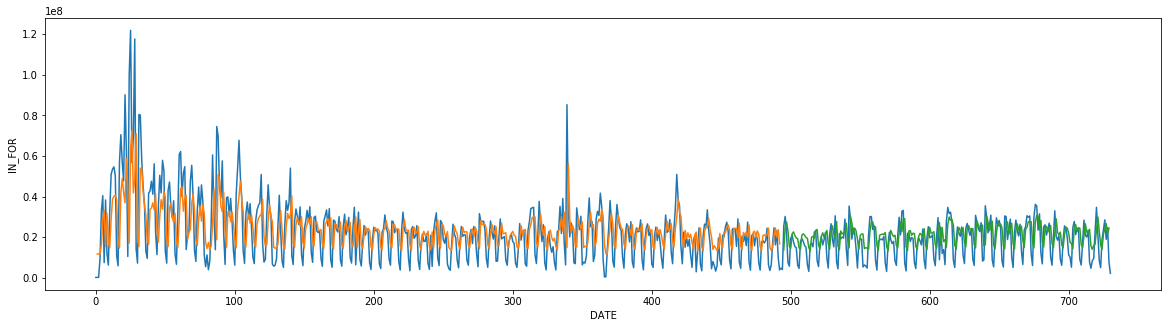

In [47]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset_out_for)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset_out_for)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset_out_for)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20, 5))
plt.plot(scaler.inverse_transform(dataset_out_for))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('DATE')
plt.ylabel('IN_FOR')
plt.show()

### Predict for IN_KZT

In [60]:
dataset_in_kzt = data['IN_KZT'].values

In [61]:
dataset_in_kzt = dataset_in_kzt.reshape(731, 1)

In [62]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_in_kzt = scaler.fit_transform(dataset_in_kzt)

In [63]:
# split into train and test sets
train_size = int(len(dataset_in_kzt) * 0.6768)
test_size = len(dataset_in_kzt) - train_size
train, test = dataset_in_kzt[0:train_size,:], dataset_in_kzt[train_size:len(dataset_in_kzt),:]
print(len(train), len(test))

494 237


In [64]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [65]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [66]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=55, batch_size=1, verbose=2)

Epoch 1/55
 - 2s - loss: 0.0131
Epoch 2/55
 - 1s - loss: 0.0081
Epoch 3/55
 - 1s - loss: 0.0079
Epoch 4/55
 - 1s - loss: 0.0075
Epoch 5/55
 - 1s - loss: 0.0073
Epoch 6/55
 - 2s - loss: 0.0070
Epoch 7/55
 - 1s - loss: 0.0067
Epoch 8/55
 - 1s - loss: 0.0065
Epoch 9/55
 - 1s - loss: 0.0065
Epoch 10/55
 - 2s - loss: 0.0064
Epoch 11/55
 - 1s - loss: 0.0063
Epoch 12/55
 - 1s - loss: 0.0062
Epoch 13/55
 - 1s - loss: 0.0063
Epoch 14/55
 - 1s - loss: 0.0062
Epoch 15/55
 - 1s - loss: 0.0062
Epoch 16/55
 - 1s - loss: 0.0062
Epoch 17/55
 - 1s - loss: 0.0062
Epoch 18/55
 - 1s - loss: 0.0062
Epoch 19/55
 - 1s - loss: 0.0062
Epoch 20/55
 - 1s - loss: 0.0061
Epoch 21/55
 - 1s - loss: 0.0061
Epoch 22/55
 - 1s - loss: 0.0062
Epoch 23/55
 - 1s - loss: 0.0062
Epoch 24/55
 - 1s - loss: 0.0062
Epoch 25/55
 - 1s - loss: 0.0061
Epoch 26/55
 - 1s - loss: 0.0062
Epoch 27/55
 - 1s - loss: 0.0062
Epoch 28/55
 - 1s - loss: 0.0062
Epoch 29/55
 - 1s - loss: 0.0061
Epoch 30/55
 - 1s - loss: 0.0061
Epoch 31/55
 - 1s -

In [67]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22294505.18 RMSE
Test Score: 22340019.78 RMSE


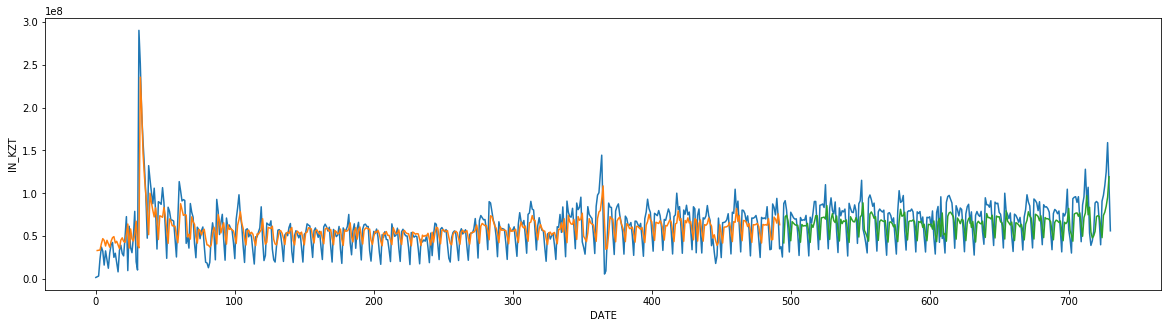

In [68]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset_in_kzt)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset_in_kzt)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset_in_kzt)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20, 5))
plt.plot(scaler.inverse_transform(dataset_in_kzt))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('DATE')
plt.ylabel('IN_KZT')
plt.show()

### Predict for OUT_KZT

In [69]:
dataset_out_kzt = data['OUT_KZT'].values

In [70]:
dataset_out_kzt = dataset_out_kzt.reshape(731, 1)

In [71]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_out_kzt = scaler.fit_transform(dataset_out_kzt)

In [72]:
# split into train and test sets
train_size = int(len(dataset_out_kzt) * 0.6768)
test_size = len(dataset_out_kzt) - train_size
train, test = dataset_out_kzt[0:train_size,:], dataset_out_kzt[train_size:len(dataset_out_kzt),:]
print(len(train), len(test))

494 237


In [73]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [74]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [75]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=55, batch_size=1, verbose=2)

Epoch 1/55
 - 2s - loss: 0.0166
Epoch 2/55
 - 1s - loss: 0.0104
Epoch 3/55
 - 2s - loss: 0.0097
Epoch 4/55
 - 1s - loss: 0.0091
Epoch 5/55
 - 1s - loss: 0.0086
Epoch 6/55
 - 1s - loss: 0.0082
Epoch 7/55
 - 1s - loss: 0.0079
Epoch 8/55
 - 1s - loss: 0.0076
Epoch 9/55
 - 1s - loss: 0.0073
Epoch 10/55
 - 1s - loss: 0.0072
Epoch 11/55
 - 1s - loss: 0.0071
Epoch 12/55
 - 1s - loss: 0.0070
Epoch 13/55
 - 1s - loss: 0.0070
Epoch 14/55
 - 1s - loss: 0.0070
Epoch 15/55
 - 1s - loss: 0.0069
Epoch 16/55
 - 1s - loss: 0.0069
Epoch 17/55
 - 1s - loss: 0.0069
Epoch 18/55
 - 1s - loss: 0.0069
Epoch 19/55
 - 1s - loss: 0.0069
Epoch 20/55
 - 1s - loss: 0.0068
Epoch 21/55
 - 1s - loss: 0.0068
Epoch 22/55
 - 1s - loss: 0.0068
Epoch 23/55
 - 1s - loss: 0.0068
Epoch 24/55
 - 1s - loss: 0.0068
Epoch 25/55
 - 1s - loss: 0.0068
Epoch 26/55
 - 1s - loss: 0.0067
Epoch 27/55
 - 1s - loss: 0.0068
Epoch 28/55
 - 1s - loss: 0.0068
Epoch 29/55
 - 1s - loss: 0.0067
Epoch 30/55
 - 1s - loss: 0.0067
Epoch 31/55
 - 1s -

In [76]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 19287557.82 RMSE
Test Score: 25175450.90 RMSE


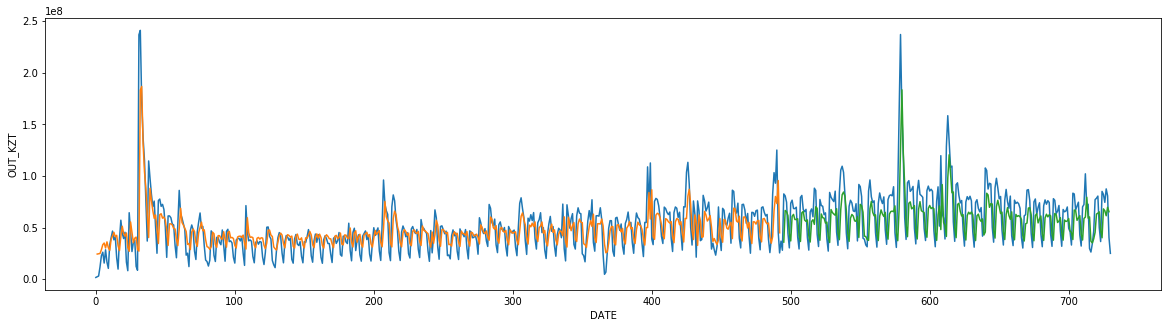

In [77]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset_out_kzt)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset_out_kzt)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset_out_kzt)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20, 5))
plt.plot(scaler.inverse_transform(dataset_out_kzt))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('DATE')
plt.ylabel('OUT_KZT')
plt.show()